<a href="https://colab.research.google.com/github/vloneonme/trew/blob/main/vipsa_lr6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf



df = pd.read_csv('vipsa-db-lr6.csv', sep=';', decimal=',')
a = df['v0213']
b = df['v0214']
t =  np.arange(len(a))


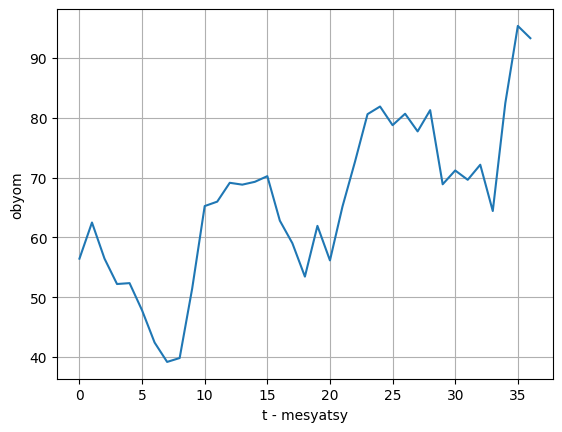

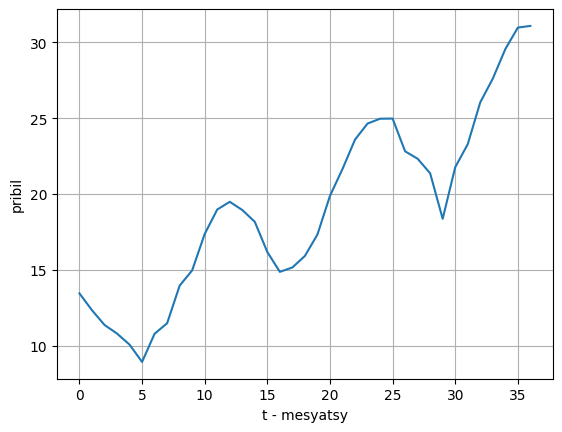

In [57]:
plt.figure()
plt.plot(t, a)
plt.xlabel('t - mesyatsy')
plt.ylabel('obyom')
plt.grid()
plt.show()

plt.figure()
plt.plot(t, b)
plt.xlabel('t - mesyatsy')
plt.ylabel('pribil')
plt.grid()
plt.show()


/tmp/ipython-input-407107701.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


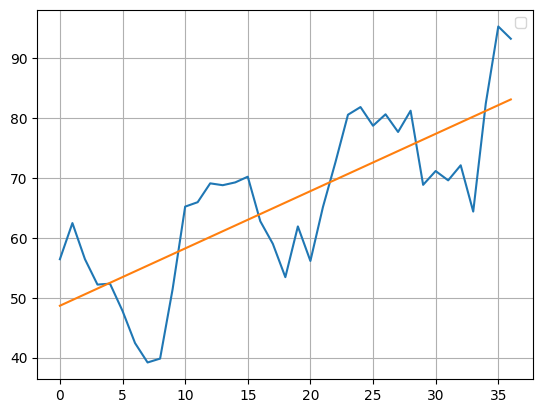

/tmp/ipython-input-407107701.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


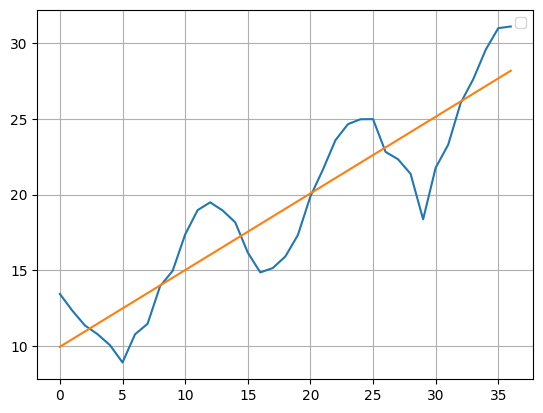

In [58]:
p1_a = np.polyfit(t, a, 1)
trend1_a = np.polyval(p1_a, t)

p1_b = np.polyfit(t, b, 1)
trend1_b = np.polyval(p1_b, t)
plt.figure()
plt.plot(t, a)
plt.plot(t, trend1_a)
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(t, b)
plt.plot(t, trend1_b)
plt.legend()
plt.grid()
plt.show()


/tmp/ipython-input-4179456823.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


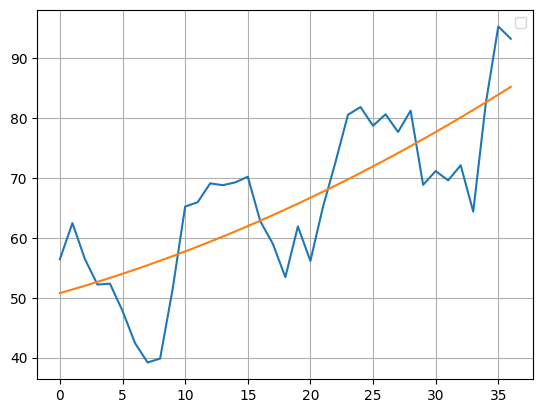

/tmp/ipython-input-4179456823.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


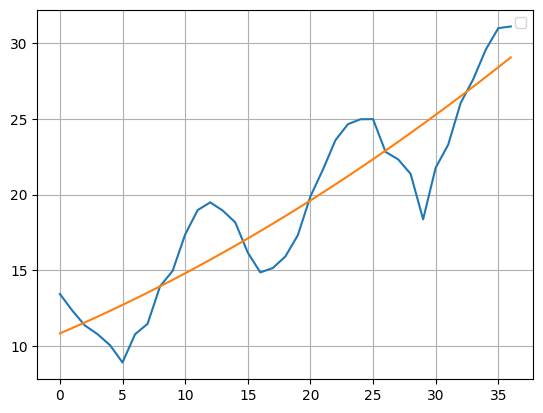

In [59]:
p2_a = np.polyfit(t, a, 2)
trend2_a = np.polyval(p2_a, t)

p2_b = np.polyfit(t, b, 2)
trend2_b = np.polyval(p2_b, t)
plt.figure()
plt.plot(t, a)
plt.plot(t, trend2_a)
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(t, b)
plt.plot(t, trend2_b)
plt.legend()
plt.grid()
plt.show()


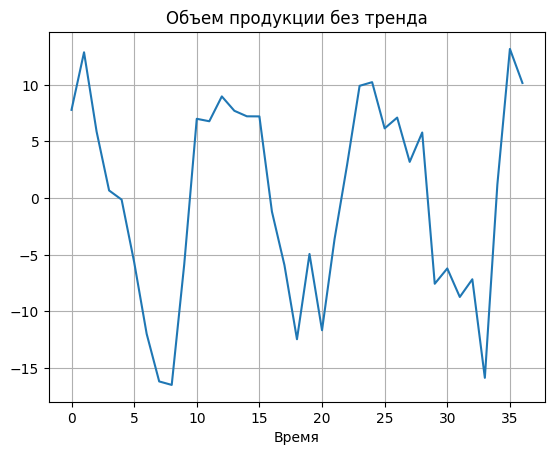

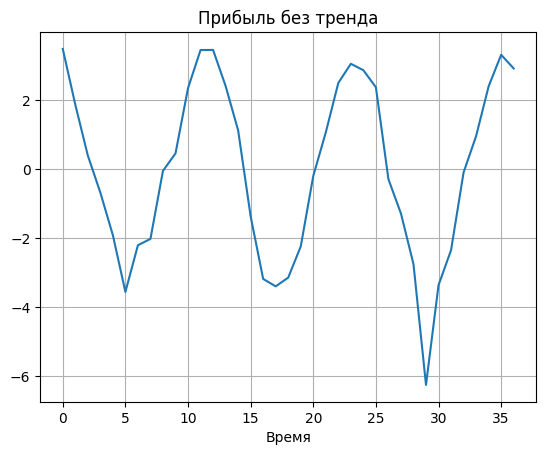

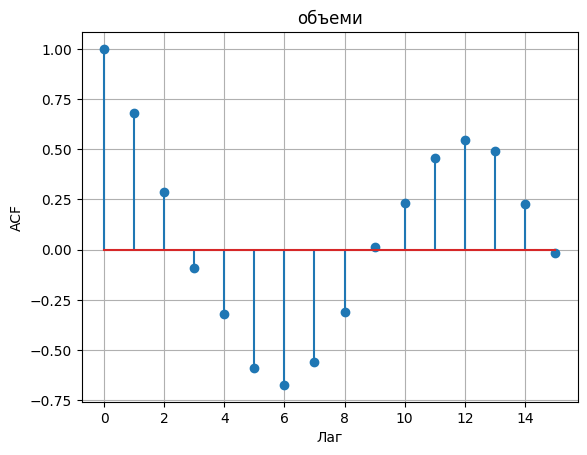

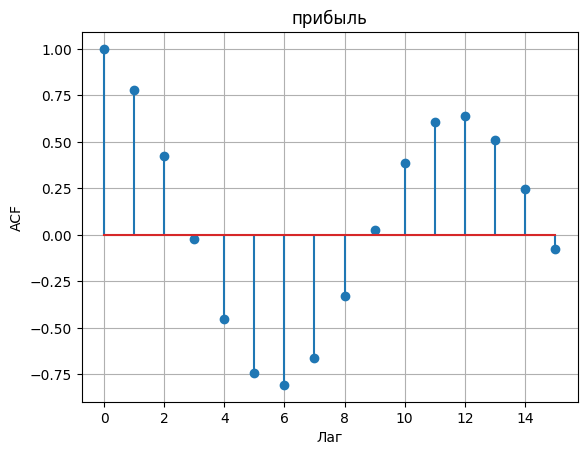

In [81]:
x = a.values  # объем продукции
y = b.values  # прибыль
t = np.arange(len(x))
trend_x = np.polyval(np.polyfit(t, x, 1), t)
trend_y = np.polyval(np.polyfit(t, y, 1), t)
x_detrended = x - trend_x
y_detrended = y - trend_y

acf_x = acf(x_detrended)
lags = np.arange(len(acf_x))

plt.figure()
plt.plot(t, x_detrended)
plt.title('Объем продукции без тренда')
plt.xlabel('Время')
plt.grid()
plt.show()

plt.figure()
plt.plot(t, y_detrended)
plt.title('Прибыль без тренда')
plt.xlabel('Время')
plt.grid()
plt.show()

plt.figure()
plt.stem(lags, acf_x)
plt.title('объеми')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid()
plt.show()

acf_y = acf(y_detrended)

plt.figure()
plt.stem(lags, acf_y)
plt.title('прибыль')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid()
plt.show()


In [67]:
dominant_freq_x = freqs_pos[np.argmax(amp_x)]
dominant_freq_y = freqs_pos[np.argmax(amp_y)]

dominant_freq_x, dominant_freq_y


(np.float64(0.08108108108108109), np.float64(0.08108108108108109))

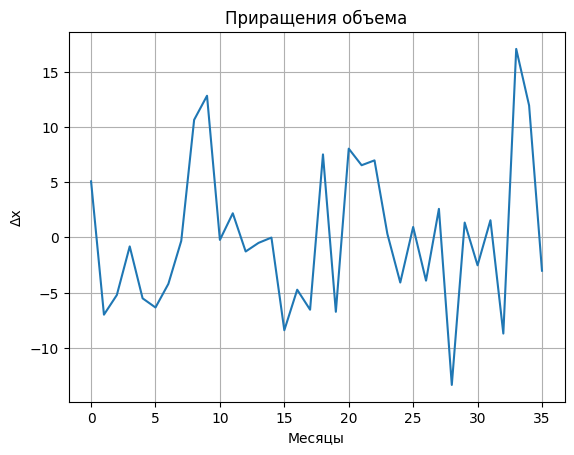

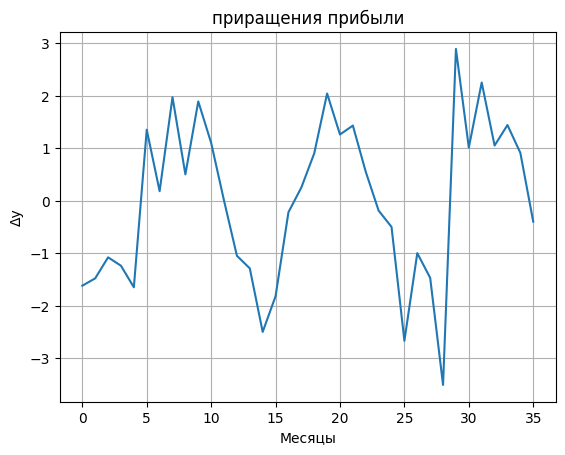

In [85]:
# Приращения после удаления тренда
dx = np.diff(x_detrended)  # объем продукции
dy = np.diff(y_detrended)  # прибыль

plt.figure()
plt.plot(dx)
plt.title('Приращения объема')
plt.xlabel('Месяцы')
plt.ylabel('Δx')
plt.grid()
plt.show()

plt.figure()
plt.plot(dy)
plt.title('приращения прибыли')
plt.xlabel('Месяцы')
plt.ylabel('Δy')
plt.grid()
plt.show()




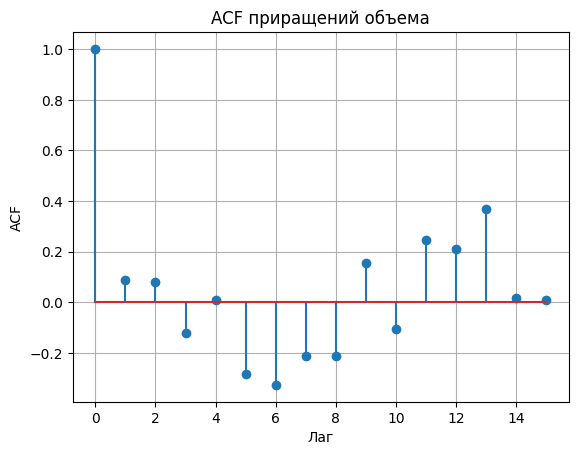

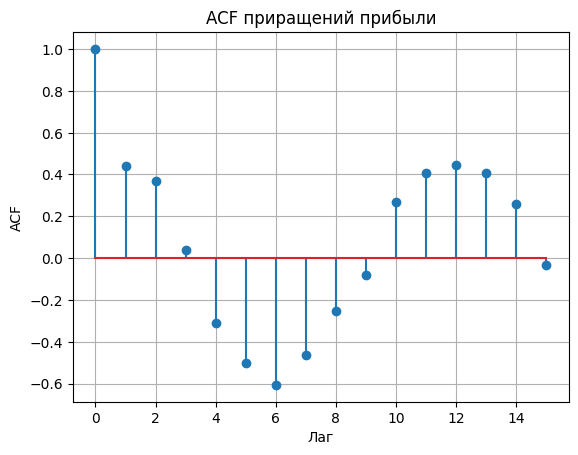

In [88]:
from statsmodels.tsa.stattools import acf

acf_dx = acf(dx)
acf_dy = acf(dy)
plt.figure()
plt.stem(acf_dx)
plt.title('ACF приращений объема')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid()
plt.show()

plt.figure()
plt.stem(acf_dy)
plt.title('ACF приращений прибыли')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid()
plt.show()


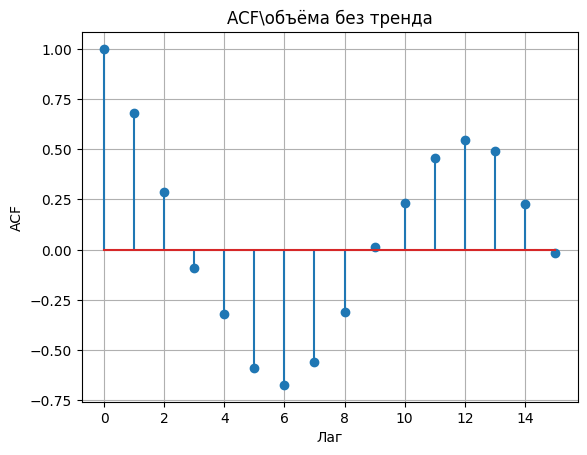

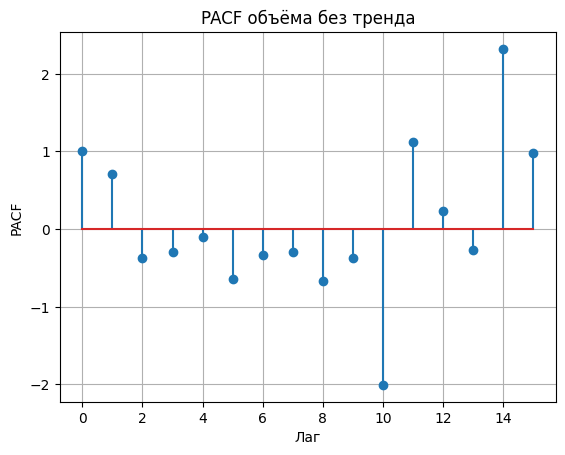

In [94]:
x = x_detrended
acf_x = acf(x)
lags = np.arange(len(acf_x))

plt.figure()
plt.stem(lags, acf_x)
plt.title('ACF\объёма без тренда')
plt.xlabel('Лаг')
plt.ylabel('ACF')
plt.grid()
plt.show()
from statsmodels.tsa.stattools import pacf

pacf_x = pacf(x)

plt.figure()
plt.stem(lags, pacf_x)
plt.title('PACF объёма без тренда')
plt.xlabel('Лаг')
plt.ylabel('PACF')
plt.grid()
plt.show()


/tmp/ipython-input-3120911541.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


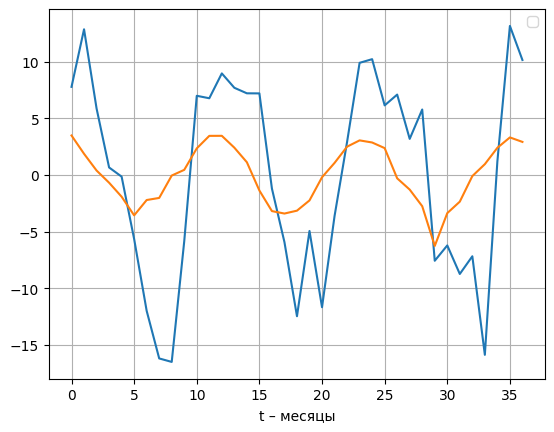

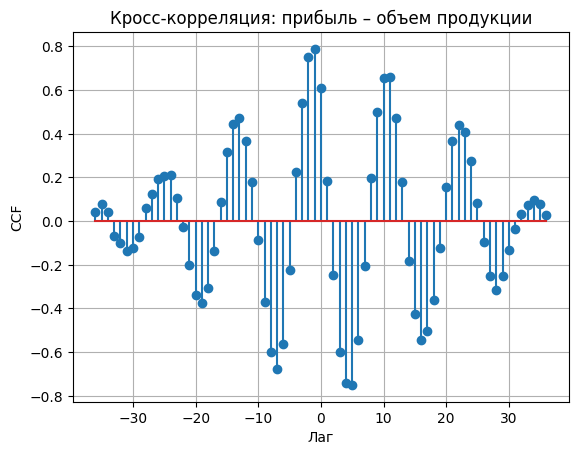

np.int64(-1)

In [102]:
y = y_detrended
plt.figure()
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('t – месяцы')
plt.legend()
plt.grid()
plt.show()

x0 = x - np.mean(x)
y0 = y - np.mean(y)

ccf_xy = np.correlate(y0, x0, mode='full')
lags = np.arange(-len(x0) + 1, len(x0))
ccf_xy = ccf_xy / (np.std(x0) * np.std(y0) * len(x0))

plt.figure()
plt.stem(lags, ccf_xy)
plt.title('Кросс-корреляция: прибыль – объем продукции')
plt.xlabel('Лаг')
plt.ylabel('CCF')
plt.grid()
plt.show()

lag_max = lags[np.argmax(ccf_xy)]
lag_max



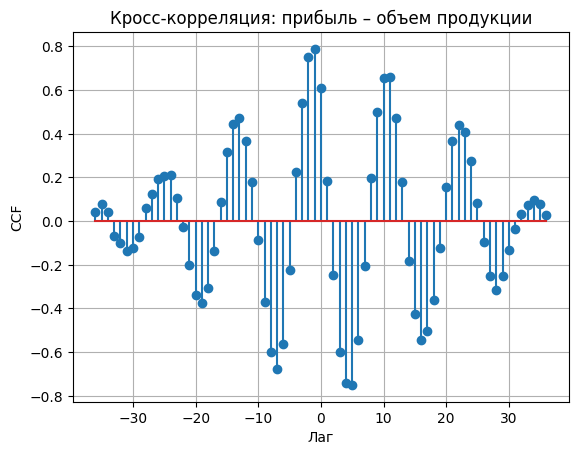

np.int64(-1)